# 📊 Netflix Data Analysis — Exploratory Data Analysis (EDA)

This notebook performs an in-depth exploratory analysis of the **Netflix Movies & TV Shows** dataset.

### 🎯 Objectives
- Understand dataset structure  
- Analyze movies vs TV shows  
- Explore country and rating distribution  
- Study release year trends  
- Extract insights for portfolio presentation  

Dataset Used: `data/processed/netflix_titles.csv`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("pastel")
df = pd.read_csv("../data/processed/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_int,main_genre,duration_type,duration_minutes,content_category
0,s1,Movie,Dick Johnson Is Dead,['Kirsten Johnson'],[''],United States,2021-09-25,2020,PG-13,90 min,['Documentaries'],"As her father nears the end of his life, filmm...",2021.0,9.0,90.0,Documentaries,min,90.0,Other
1,s2,TV Show,Blood & Water,[''],"['Ama Qamata', 'Khosi Ngema', 'Gail Mabalane',...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"['International TV Shows', 'TV Dramas', 'TV My...","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2.0,International TV Shows,Seasons,90.0,Other
2,s3,TV Show,Ganglands,['Julien Leclercq'],"['Sami Bouajila', 'Tracy Gotoas', 'Samuel Jouy...",Unknown,2021-09-24,2021,TV-MA,1 Season,"['Crime TV Shows', 'International TV Shows', '...",To protect his family from a powerful drug lor...,2021.0,9.0,1.0,Crime TV Shows,Season,45.0,Other
3,s4,TV Show,Jailbirds New Orleans,[''],[''],Unknown,2021-09-24,2021,TV-MA,1 Season,"['Docuseries', 'Reality TV']","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1.0,Docuseries,Season,45.0,Other
4,s5,TV Show,Kota Factory,[''],"['Mayur More', 'Jitendra Kumar', 'Ranjan Raj',...",India,2021-09-24,2021,TV-MA,2 Seasons,"['International TV Shows', 'Romantic TV Shows'...",In a city of coaching centers known to train I...,2021.0,9.0,2.0,International TV Shows,Seasons,90.0,Other


In [2]:
df.shape, df.columns
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   show_id           8807 non-null   object 
 1   type              8807 non-null   object 
 2   title             8807 non-null   object 
 3   director          8807 non-null   object 
 4   cast              8807 non-null   object 
 5   country           8807 non-null   object 
 6   date_added        8709 non-null   object 
 7   release_year      8807 non-null   int64  
 8   rating            8807 non-null   object 
 9   duration          8804 non-null   object 
 10  listed_in         8807 non-null   object 
 11  description       8807 non-null   object 
 12  year_added        8709 non-null   float64
 13  month_added       8709 non-null   float64
 14  duration_int      8804 non-null   float64
 15  main_genre        8807 non-null   object 
 16  duration_type     8804 non-null   object 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_int,main_genre,duration_type,duration_minutes,content_category
count,8807,8807,8807,8807,8807,8807,8709,8807.000000,8807,8804,8807,8807,8709.000000,8709.000000,8804.000000,8807,8804,8804.000000,8807
unique,8807,2,8807,4529,7693,749,1699,NaN,18,220,514,8775,NaN,NaN,NaN,36,3,NaN,6
top,s8807,Movie,Zubaan,[''],[''],United States,2020-01-01,NaN,TV-MA,1 Season,"['Dramas', 'International Movies']","Paranormal activity at a lush, abandoned prope...",NaN,NaN,NaN,Dramas,min,NaN,Other
freq,1,6131,1,2634,825,2818,109,NaN,3207,1793,362,4,NaN,NaN,NaN,1600,6128,NaN,4594
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN,2018.887932,6.653347,69.846888,NaN,NaN,93.451159,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN,1.567961,3.431434,50.814828,NaN,NaN,46.738730,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN,2008.000000,1.000000,1.000000,NaN,NaN,3.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,2018.000000,4.000000,2.000000,NaN,NaN,57.750000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,2019.000000,7.000000,88.000000,NaN,NaN,92.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN,2020.000000,10.000000,106.000000,NaN,NaN,111.000000,NaN


## 🔎 Missing Values in Dataset
This heatmap highlights where the dataset contains missing values.


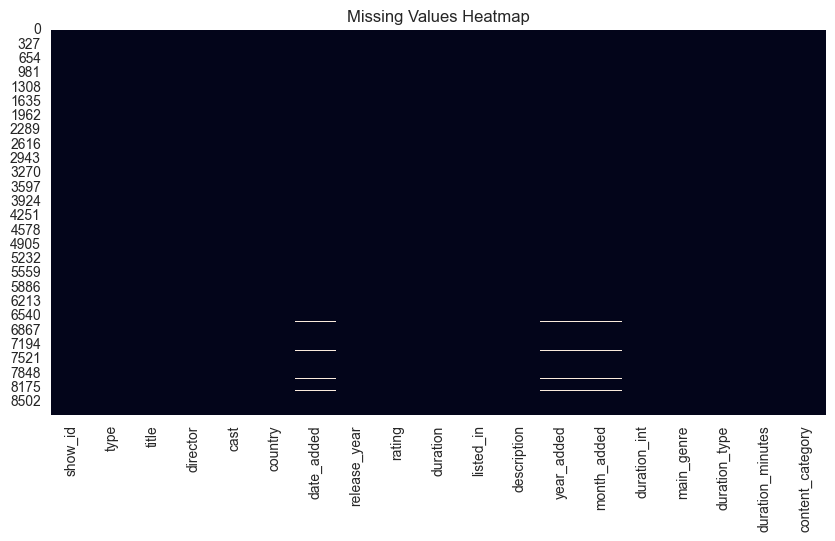

In [3]:

df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()



## 🎬 Movies vs TV Shows — Overall Content Distribution


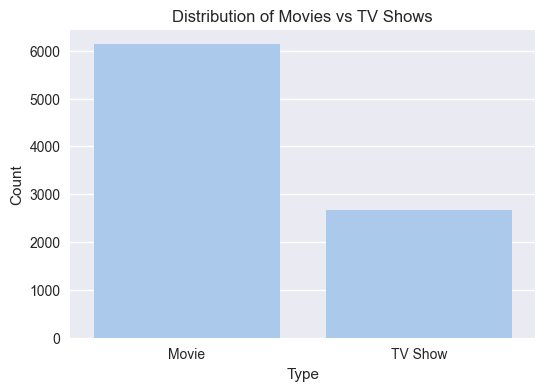

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [4]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title("Distribution of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

type_counts


## 📈 Release Trend of Netflix Content Over the Years


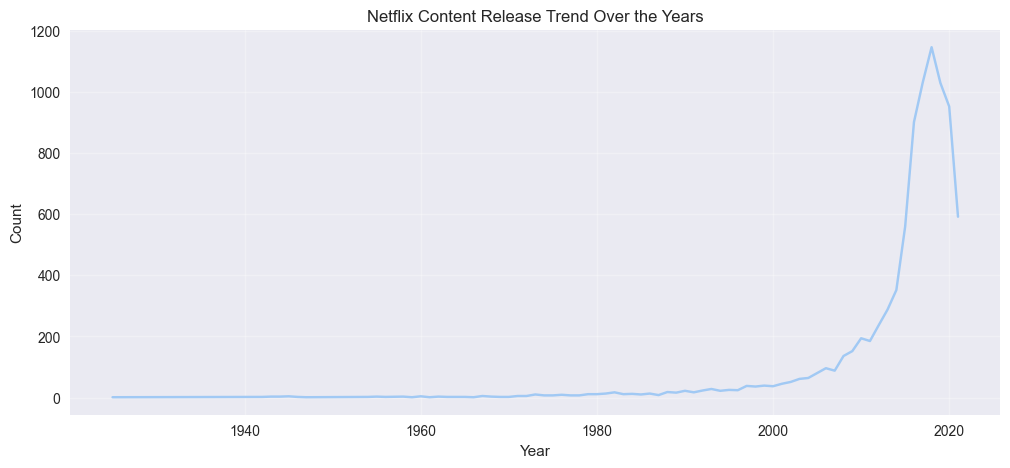

In [5]:
plt.figure(figsize=(12,5))
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title("Netflix Content Release Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()


## 🌍 Top 10 Countries Producing Netflix Titles


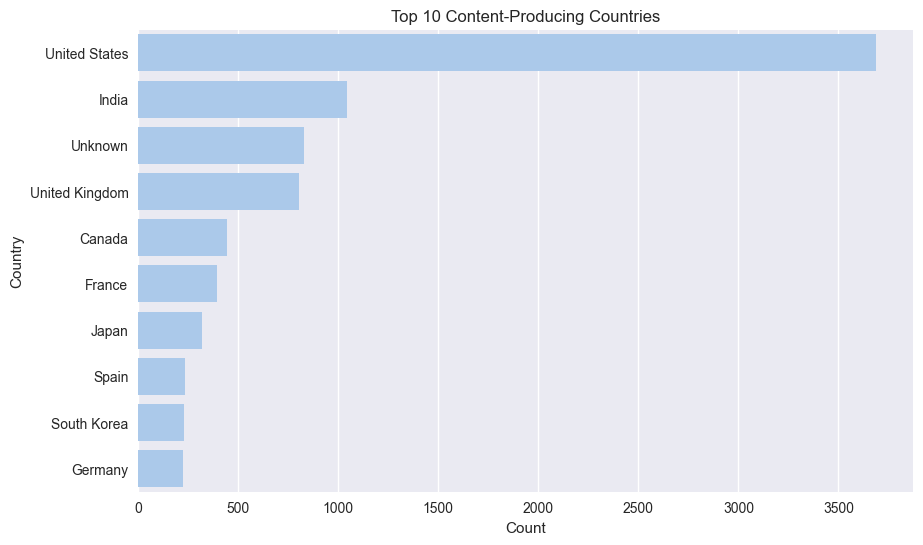

United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Name: count, dtype: int64

In [6]:
country_series = df['country'].dropna().str.split(", ", expand=True).stack()
top_countries = country_series.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Content-Producing Countries")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

top_countries


## ⭐ Distribution of Ratings


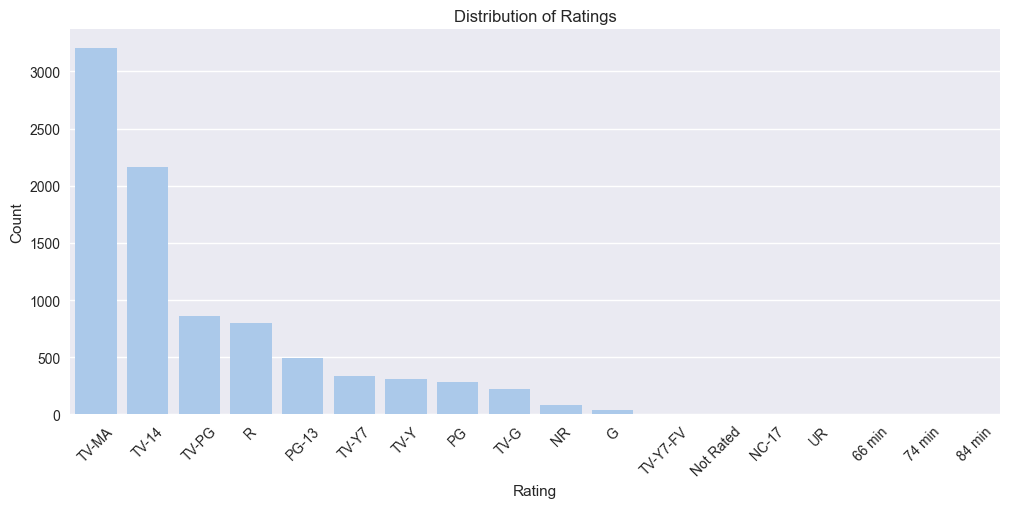

In [7]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['rating'], order=df['rating'].value_counts().index)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## ⏱️ Most Common Movie Durations


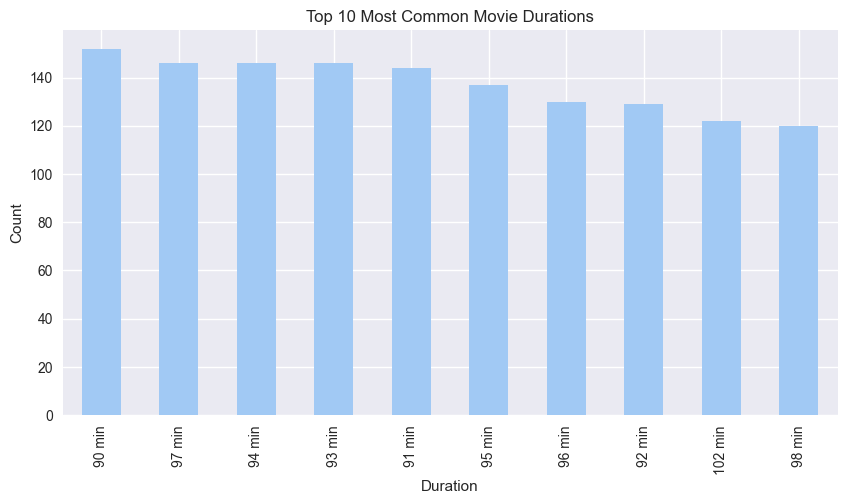

In [8]:
movies = df[df['type']=="Movie"]

plt.figure(figsize=(10,5))
movies['duration'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Common Movie Durations")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.show()


## 🎭 Top 10 Genres on Netflix


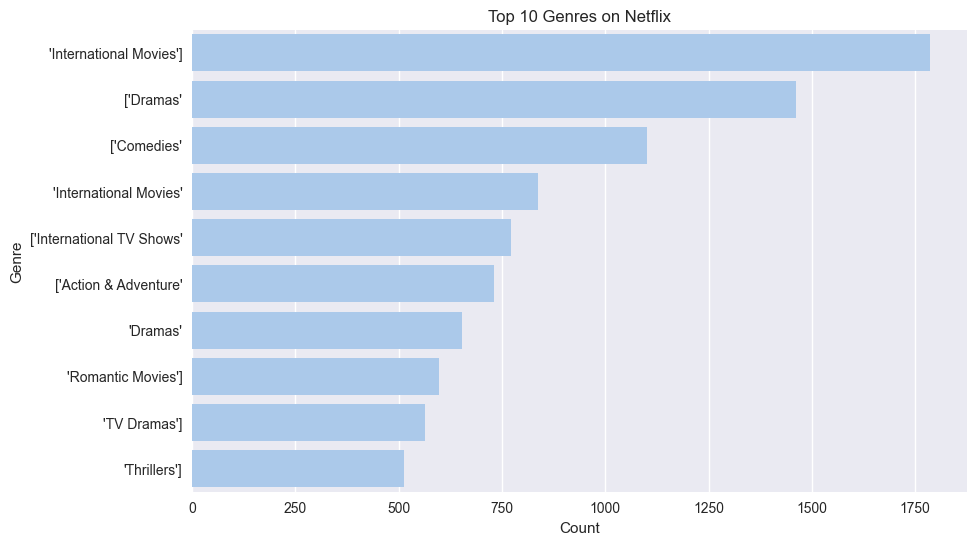

'International Movies']      1786
['Dramas'                    1462
['Comedies'                  1100
'International Movies'        838
['International TV Shows'     772
['Action & Adventure'         731
'Dramas'                      654
'Romantic Movies']            597
'TV Dramas']                  563
'Thrillers']                  512
Name: count, dtype: int64

In [9]:
genre_series = df['listed_in'].str.split(", ", expand=True).stack()
top_genres = genre_series.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

top_genres


## 📝 Word Cloud of Description Texts


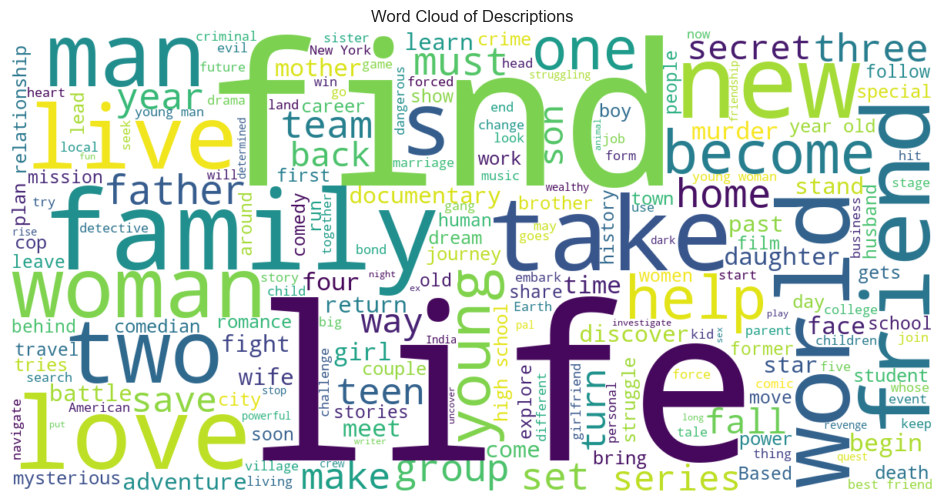

In [10]:
from wordcloud import WordCloud

text = " ".join(df['description'].dropna())
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Descriptions")
plt.show()


# 📌 Final Insights Summary

### 🎬 Movies vs TV Shows
Movies dominate Netflix content compared to TV Shows.

### 🌍 Country Analysis
US and India contribute the most content.

### ⭐ Ratings
TV-MA and TV-14 are the most common ratings.

### 🗓️ Trend
A sharp rise in content production after 2015.

### 🎭 Genres
Drama, International Movies, and Documentaries lead the platform.

